In [106]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [92]:
benign_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final.pkl')

In [59]:
benign_datas.head(15)

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,dst_ip,dst_port,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,src_ip,src_port,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
0,1,1100.000000,62.385630,2048.0,-1.000000,52.11.17.245,tcp,0,19,1,1,1,2.0,1.000000,1,17,1.0,0.000000,1.0,-15.105215,0.0,4.986686,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,676,3371
1,1,433.000000,34.439441,2048.0,-1.000000,52.34.37.177,tcp,0,32,1,1,2,2.0,2.000000,2,27,1.0,0.500000,1.0,-39.367126,0.0,6.339901,0.000000,1.0,1.000000,10.0.2.15,443,28.151073,0.000000,-1.000000,1015,6435
2,3,83.333333,205.035343,2176.0,700.750478,172.217.23.142,tcp,0,1671,1,1,19,3.0,22.333333,27,1051,1.0,0.296296,1.0,-205.703717,0.0,4.480595,0.000000,1.0,0.703704,10.0.2.15,443,122.012281,0.471405,1023.683530,167611,750997
3,1,1185.000000,53.466544,2048.0,0.150618,54.192.44.177,tcp,0,175,1,1,7,2.0,2.000000,7,116,1.0,0.428571,1.0,-14.430779,0.0,22.244222,0.000000,1.0,1.000000,10.0.2.15,443,55.243919,0.000000,0.295265,3591,79879
4,1,546.000000,44.118418,2048.0,1444.325280,204.79.197.200,tcp,0,145,1,1,5,2.0,71.000000,5,100,1.0,0.400000,1.0,-31.336983,0.0,4.382886,0.000000,1.0,1.000000,10.0.2.15,443,30.845449,0.000000,819.540532,16992,74474
5,3,83.333333,206.289581,2176.0,255.922028,172.217.23.174,tcp,0,3778,1,1,35,3.0,22.333333,54,2136,1.0,0.055556,1.0,-205.696967,0.0,12.879819,0.058824,1.0,0.686275,10.0.2.15,443,261.557487,0.471405,340.138351,167032,2151342
6,1,749.000000,67.156584,2048.0,-1.000000,54.149.74.139,tcp,0,30,1,1,1,2.0,1.000000,1,24,1.0,0.000000,1.0,-22.946406,0.0,3.972846,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,2983,11851
7,1,1185.000000,5.302195,2048.0,-1.000000,54.192.44.108,tcp,0,21,1,1,2,2.0,2.000000,2,18,1.0,0.500000,1.0,-14.430779,0.0,10.054201,0.000000,1.0,1.000000,10.0.2.15,443,0.071130,0.000000,-1.000000,738,7420
8,1,1100.000000,34.012658,2048.0,-1.000000,52.39.210.199,tcp,0,29,1,1,2,2.0,4.000000,2,24,1.0,0.500000,1.0,-15.149740,0.0,5.119531,0.000000,1.0,1.000000,10.0.2.15,443,27.642992,0.000000,-1.000000,1280,6553
9,1,731.000000,1.303134,2048.0,-1.000000,131.253.61.100,tcp,0,13,1,1,1,2.0,17.000000,1,11,1.0,0.000000,1.0,-22.895261,0.0,6.220058,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,1027,6388


In [60]:
benign_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 32 columns):
amount_diff_cert                5846 non-null int64
avg_of_cert_length              5846 non-null float64
avg_of_duration                 5846 non-null float64
avg_of_public_key               5846 non-null float64
avg_periodicity                 5846 non-null float64
dst_ip                          5846 non-null object
dst_port                        5846 non-null object
get_SNI_equal_Dst_IP            5846 non-null int64
inbound_pckts                   5846 non-null int64
is_CNs_in_SNA_dns               5846 non-null int64
is_SNIs_in_SNA_dns              5846 non-null int64
is_valid_cert                   5846 non-null int64
number_of_cert_path             5846 non-null float64
number_of_domains               5846 non-null float64
number_of_flows                 5846 non-null int64
outbound_pckts                  5846 non-null int64
percent_of_established_stats    5846 non-null f

In [79]:
max_series = benign_datas.select_dtypes(include=[np.number]).max()

In [93]:
datas = benign_datas.copy()

In [80]:
for max_info in max_series.iteritems():
    if max_info[1] > 0:
        datas[max_info[0]] = benign_datas[max_info[0]].apply(lambda x : x if x == float(-1.0) else x / max_info[1])

In [84]:
datas.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 28 columns):
amount_diff_cert                5846 non-null float64
avg_of_cert_length              5846 non-null float64
avg_of_duration                 5846 non-null float64
avg_of_public_key               5846 non-null float64
avg_periodicity                 5846 non-null float64
get_SNI_equal_Dst_IP            5846 non-null int64
inbound_pckts                   5846 non-null float64
is_CNs_in_SNA_dns               5846 non-null float64
is_SNIs_in_SNA_dns              5846 non-null float64
is_valid_cert                   5846 non-null float64
number_of_cert_path             5846 non-null float64
number_of_domains               5846 non-null float64
number_of_flows                 5846 non-null float64
outbound_pckts                  5846 non-null float64
percent_of_established_stats    5846 non-null float64
percent_of_stdev_duration       5846 non-null float64
ratio_of_SNI_ssl               

In [89]:
datas.head(10)

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,dst_ip,dst_port,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,src_ip,src_port,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
0,0.25,0.149660,0.010845,0.250000,-1.000000,52.11.17.245,tcp,0,0.000080,1.0,1.0,0.011236,0.250,0.001835,0.005464,0.000457,1.0,0.000000,1.0,-15.226983,0.0,0.000026,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,0.000377,0.000012
1,0.25,0.058912,0.005987,0.250000,-1.000000,52.34.37.177,tcp,0,0.000134,1.0,1.0,0.022472,0.250,0.003670,0.010929,0.000725,1.0,0.500000,1.0,-39.684477,0.0,0.000033,0.000000,1.0,1.000000,10.0.2.15,443,0.002847,0.000000,-1.000000,0.000566,0.000022
2,0.75,0.011338,0.035643,0.265625,0.032282,172.217.23.142,tcp,0,0.007013,1.0,1.0,0.213483,0.375,0.040979,0.147541,0.028225,1.0,0.296296,1.0,-207.361962,0.0,0.000024,0.000000,1.0,0.703704,10.0.2.15,443,0.012338,0.000135,0.155280,0.093516,0.002568
3,0.25,0.161224,0.009295,0.250000,0.000007,54.192.44.177,tcp,0,0.000735,1.0,1.0,0.078652,0.250,0.003670,0.038251,0.003115,1.0,0.428571,1.0,-14.547110,0.0,0.000117,0.000000,1.0,1.000000,10.0.2.15,443,0.005586,0.000000,0.000045,0.002004,0.000273
4,0.25,0.074286,0.007669,0.250000,0.066537,204.79.197.200,tcp,0,0.000609,1.0,1.0,0.056180,0.250,0.130275,0.027322,0.002686,1.0,0.400000,1.0,-31.589601,0.0,0.000023,0.000000,1.0,1.000000,10.0.2.15,443,0.003119,0.000000,0.124314,0.009480,0.000255
5,0.75,0.011338,0.035861,0.265625,0.011790,172.217.23.174,tcp,0,0.015857,1.0,1.0,0.393258,0.375,0.040979,0.295082,0.057364,1.0,0.055556,1.0,-207.355158,0.0,0.000068,0.013575,1.0,0.686275,10.0.2.15,443,0.026449,0.000135,0.051595,0.093193,0.007356
6,0.25,0.101905,0.011674,0.250000,-1.000000,54.149.74.139,tcp,0,0.000126,1.0,1.0,0.011236,0.250,0.001835,0.005464,0.000645,1.0,0.000000,1.0,-23.131384,0.0,0.000021,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,0.001664,0.000041
7,0.25,0.161224,0.000922,0.250000,-1.000000,54.192.44.108,tcp,0,0.000088,1.0,1.0,0.022472,0.250,0.003670,0.010929,0.000483,1.0,0.500000,1.0,-14.547110,0.0,0.000053,0.000000,1.0,1.000000,10.0.2.15,443,0.000007,0.000000,-1.000000,0.000412,0.000025
8,0.25,0.149660,0.005913,0.250000,-1.000000,52.39.210.199,tcp,0,0.000122,1.0,1.0,0.022472,0.250,0.007339,0.010929,0.000645,1.0,0.500000,1.0,-15.271867,0.0,0.000027,0.000000,1.0,1.000000,10.0.2.15,443,0.002795,0.000000,-1.000000,0.000714,0.000022
9,0.25,0.099456,0.000227,0.250000,-1.000000,131.253.61.100,tcp,0,0.000055,1.0,1.0,0.011236,0.250,0.031193,0.005464,0.000295,1.0,0.000000,1.0,-23.079827,0.0,0.000033,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,0.000573,0.000022


In [99]:
minMaxScaler = MinMaxScaler()
npScaled = minMaxScaler.fit_transform(datas.select_dtypes(include=[np.number]))
print(npScaled)

[[2.50000000e-01 1.49775541e-01 1.08140846e-02 ... 0.00000000e+00
  2.71185835e-04 1.15263732e-05]
 [2.50000000e-01 5.90395865e-02 5.95580407e-03 ... 0.00000000e+00
  4.60346326e-04 2.20030293e-05]
 [7.50000000e-01 1.14723620e-02 3.56128975e-02 ... 1.55408495e-01
  9.34201723e-02 2.56786464e-03]
 ...
 [2.50000000e-01 1.59570127e-01 1.06801153e-02 ... 0.00000000e+00
  3.62139109e-04 1.32086561e-05]
 [2.50000000e-01 1.08012515e-01 1.06071759e-02 ... 0.00000000e+00
  3.30891359e-04 1.46550091e-05]
 [2.50000000e-01 1.15630526e-02 1.83353647e-04 ... 0.00000000e+00
  4.34120535e-04 1.73083658e-05]]


/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [100]:
X = npScaled
input_flow = Input(shape=(28, ))
encoded = Dense(20, activation='relu')(input_flow)
encoded = Dense(12, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(encoded)
decoded = Dense(28, activation='sigmoid')(decoded)
autoencoder = Model(input_flow, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X, X,
                epochs=30,
                batch_size=10,
                shuffle=True)

Epoch 1/30
5846/5846 [==============================] - 2s 386us/step - loss: 0.0255
Epoch 2/30
5846/5846 [==============================] - 2s 380us/step - loss: 0.0062
Epoch 3/30
5846/5846 [==============================] - 3s 573us/step - loss: 0.0041
Epoch 4/30
5846/5846 [==============================] - 3s 509us/step - loss: 0.0032
Epoch 5/30
5846/5846 [==============================] - 3s 500us/step - loss: 0.0026
Epoch 6/30
5846/5846 [==============================] - 2s 381us/step - loss: 0.0023
Epoch 7/30
5846/5846 [==============================] - 2s 383us/step - loss: 0.0021
Epoch 8/30
5846/5846 [==============================] - 3s 482us/step - loss: 0.0018
Epoch 9/30
5846/5846 [==============================] - 3s 484us/step - loss: 0.0016
Epoch 10/30
5846/5846 [==============================] - 3s 478us/step - loss: 0.0014
Epoch 11/30
5846/5846 [==============================] - 3s 479us/step - loss: 0.0013
Epoch 12/30
5846/5846 [==============================] - 2s 417

In [104]:
X_pred = autoencoder.predict(X)

In [116]:
compare = (X - X_pred) ** 2

In [119]:
mean_list = np.mean(compare, axis=1)

In [120]:
mean_list

array([2.41354065e-05, 5.97054862e-05, 5.58281519e-04, ...,
       2.34263720e-05, 2.06336772e-05, 4.82339296e-05])

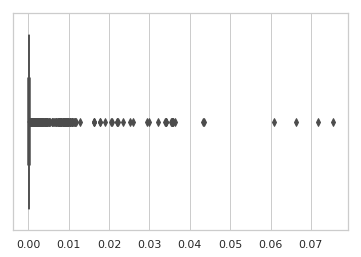

In [121]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=mean_list)

In [103]:
malware_path = '/home/sdsra/Downloads/CTU-13-Dataset/malware'
malware_dir_list = os.listdir(malware_path)
malware_datas = pd.DataFrame()
for malware_dir in malware_dir_list:
    trgt_malware_dir = malware_path + '/' + malware_dir
    if os.path.isfile(trgt_malware_dir + '/datas.pkl'):
        tmp_datas = pd.read_pickle(trgt_malware_dir + '/datas.pkl')
        malware_datas = pd.concat([malware_datas, tmp_datas], ignore_index=True)

In [122]:
npScaledMalware = minMaxScaler.fit_transform(malware_datas.select_dtypes(include=[np.number]))

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [124]:
X_malware = npScaledMalware.copy()

In [125]:
X_malware_pred = autoencoder.predict(X_malware)

In [126]:
compare_malware = (X_malware - X_malware_pred) ** 2

In [127]:
mean_list_malware = np.mean(compare_malware, axis=1)

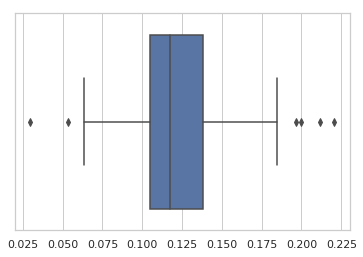

In [128]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=mean_list_malware)

In [129]:
benign_datas

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,dst_ip,dst_port,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,src_ip,src_port,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
0,1,1100.000000,62.385630,2048.0,-1.000000,52.11.17.245,tcp,0,19,1,1,1,2.0,1.000000,1,17,1.0,0.000000,1.0,-15.105215,0.0,4.986686,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,676,3371
1,1,433.000000,34.439441,2048.0,-1.000000,52.34.37.177,tcp,0,32,1,1,2,2.0,2.000000,2,27,1.0,0.500000,1.0,-39.367126,0.0,6.339901,0.000000,1.0,1.000000,10.0.2.15,443,28.151073,0.000000,-1.000000,1015,6435
2,3,83.333333,205.035343,2176.0,700.750478,172.217.23.142,tcp,0,1671,1,1,19,3.0,22.333333,27,1051,1.0,0.296296,1.0,-205.703717,0.0,4.480595,0.000000,1.0,0.703704,10.0.2.15,443,122.012281,0.471405,1023.683530,167611,750997
3,1,1185.000000,53.466544,2048.0,0.150618,54.192.44.177,tcp,0,175,1,1,7,2.0,2.000000,7,116,1.0,0.428571,1.0,-14.430779,0.0,22.244222,0.000000,1.0,1.000000,10.0.2.15,443,55.243919,0.000000,0.295265,3591,79879
4,1,546.000000,44.118418,2048.0,1444.325280,204.79.197.200,tcp,0,145,1,1,5,2.0,71.000000,5,100,1.0,0.400000,1.0,-31.336983,0.0,4.382886,0.000000,1.0,1.000000,10.0.2.15,443,30.845449,0.000000,819.540532,16992,74474
5,3,83.333333,206.289581,2176.0,255.922028,172.217.23.174,tcp,0,3778,1,1,35,3.0,22.333333,54,2136,1.0,0.055556,1.0,-205.696967,0.0,12.879819,0.058824,1.0,0.686275,10.0.2.15,443,261.557487,0.471405,340.138351,167032,2151342
6,1,749.000000,67.156584,2048.0,-1.000000,54.149.74.139,tcp,0,30,1,1,1,2.0,1.000000,1,24,1.0,0.000000,1.0,-22.946406,0.0,3.972846,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,2983,11851
7,1,1185.000000,5.302195,2048.0,-1.000000,54.192.44.108,tcp,0,21,1,1,2,2.0,2.000000,2,18,1.0,0.500000,1.0,-14.430779,0.0,10.054201,0.000000,1.0,1.000000,10.0.2.15,443,0.071130,0.000000,-1.000000,738,7420
8,1,1100.000000,34.012658,2048.0,-1.000000,52.39.210.199,tcp,0,29,1,1,2,2.0,4.000000,2,24,1.0,0.500000,1.0,-15.149740,0.0,5.119531,0.000000,1.0,1.000000,10.0.2.15,443,27.642992,0.000000,-1.000000,1280,6553
9,1,731.000000,1.303134,2048.0,-1.000000,131.253.61.100,tcp,0,13,1,1,1,2.0,17.000000,1,11,1.0,0.000000,1.0,-22.895261,0.0,6.220058,0.000000,1.0,1.000000,10.0.2.15,443,0.000000,0.000000,-1.000000,1027,6388
